<a href="https://colab.research.google.com/github/AyaSerageldin/Supply-Chain-Analysis/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from google.colab import files

uploaded = files.upload()

Saving DataCoSupplyChainDataset.xlsx to DataCoSupplyChainDataset (3).xlsx


In [85]:
import pandas as pd

#READ THE DATASET INTO PANDAS DATAFRAME#
File_Name= 'DataCoSupplyChainDataset.xlsx'
df=pd.read_excel('DataCoSupplyChainDataset.xlsx')

EDA

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [87]:
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91,315,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,328,0,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249,311,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,328,0,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-248,310,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,328,0,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,23,305,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,328,0,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134,298,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,328,0,2018-01-15 11:24:00,Standard Class


In [88]:
df.size


9567507

In [89]:
print(df.dtypes)


Type                                     object
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Benefit per order                       float64
Sales per customer                      float64
Delivery Status                          object
Late_delivery_risk                        int64
Category Id                               int64
Category Name                            object
Customer City                            object
Customer Country                         object
Customer Email                           object
Customer Fname                           object
Customer Id                               int64
Customer Lname                           object
Customer Password                        object
Customer Segment                         object
Customer State                           object
Customer Street                          object
Customer Zipcode                        float64
Department Id                           

DATA PREPROCESSING

In [90]:
print(df.isnull().sum())

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [91]:
#Check For Missing Values#


df['Customer Lname'].fillna('NONE',inplace=True)
df['Order Zipcode'].fillna(0,inplace=True)
df['Customer Zipcode'].fillna(0,inplace=True)

del df['Product Description']

print(df.isnull().sum())

<ipython-input-91-e26aab3ec296>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Lname'].fillna('NONE',inplace=True)
<ipython-input-91-e26aab3ec296>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Type                           180519 non-null  object        
 1   Days for shipping (real)       180519 non-null  int64         
 2   Days for shipment (scheduled)  180519 non-null  int64         
 3   Benefit per order              180519 non-null  float64       
 4   Sales per customer             180519 non-null  float64       
 5   Delivery Status                180519 non-null  object        
 6   Late_delivery_risk             180519 non-null  int64         
 7   Category Id                    180519 non-null  int64         
 8   Category Name                  180519 non-null  object        
 9   Customer City                  180519 non-null  object        
 10  Customer Country               180519 non-null  object        
 11  

In [93]:
#Check For duplication#
print(df.duplicated().sum())

0


In [94]:
#DROP Unnecessary columns to free up space#

df.drop(['Customer Fname','Customer Lname','Customer Email','Customer Password','Customer Zipcode', 'Customer Street','Product Status',
         'Product Image','Category Name','Order Zipcode','Department Name'],axis=1,inplace=True)


In [95]:
df.shape

(180519, 41)

In [96]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Customer City,Customer Country,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91,315,Advance shipping,0,73,Caguas,Puerto Rico,...,91,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,328,2018-02-03 22:56:00,Standard Class
1,TRANSFER,5,4,-249,311,Late delivery,1,73,Caguas,Puerto Rico,...,-249,South Asia,Rajastán,PENDING,1360,73,Smart watch,328,2018-01-18 12:27:00,Standard Class
2,CASH,4,4,-248,310,Shipping on time,0,73,San Jose,EE. UU.,...,-248,South Asia,Rajastán,CLOSED,1360,73,Smart watch,328,2018-01-17 12:06:00,Standard Class
3,DEBIT,3,4,23,305,Advance shipping,0,73,Los Angeles,EE. UU.,...,23,Oceania,Queensland,COMPLETE,1360,73,Smart watch,328,2018-01-16 11:45:00,Standard Class
4,PAYMENT,2,4,134,298,Advance shipping,0,73,Caguas,Puerto Rico,...,134,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,328,2018-01-15 11:24:00,Standard Class


In [97]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,shipping date (DateOrders)
count,"180,519","180,519","180,519","180,519","180,519","180,519","180,519","180,519","180,519","180,519",...,"180,519","180,519","180,519","180,519","180,519","180,519","180,519","180,519","180,519",180519
mean,3,3,22,183,1,32,"6,691",5,30,-85,...,141,0,2,204,183,22,693,32,141,2016-06-16 05:45:23.202433024
min,0,0,"-4,275",7,0,2,1,2,-34,-158,...,10,-3,1,10,7,"-4,275",19,2,10,2015-01-03 00:00:00
25%,2,2,7,104,0,18,"3,258",4,18,-98,...,50,0,1,120,104,7,403,18,50,2015-09-25 06:59:00
50%,3,4,32,164,1,29,"6,457",5,33,-77,...,60,0,1,200,164,32,627,29,60,2016-06-15 08:32:00
75%,5,4,65,247,1,45,"9,779",7,39,-66,...,200,0,3,300,247,65,"1,004",45,200,2017-03-04 21:29:00
max,6,4,912,"1,940",1,76,"20,757",12,49,115,...,"2,000",0,5,"2,000","1,940",912,"1,363",76,"2,000",2018-02-06 22:14:00
std,2,1,104,120,0,16,"4,163",2,10,21,...,140,0,1,132,120,104,336,16,140,NaN


   Year  Order Item Total
0  2015        11,089,544
1  2016        11,055,997
2  2017        10,610,910
3  2018           297,952


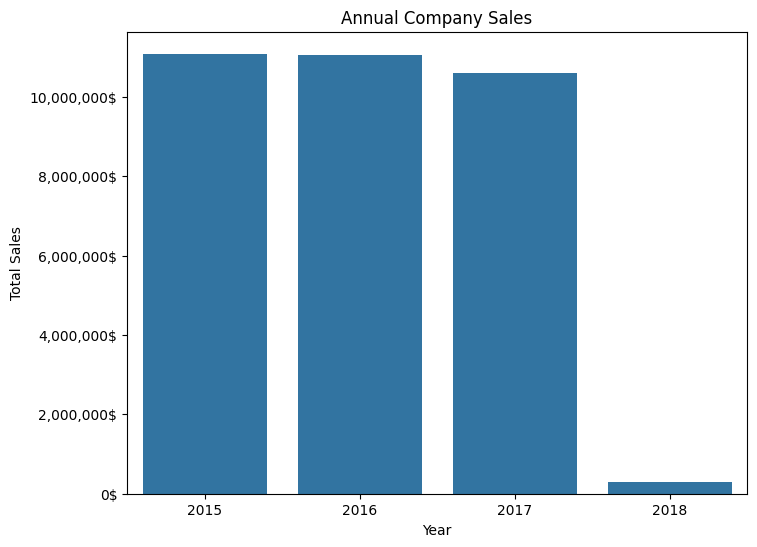

In [98]:
from datetime import date
#DISPLAY COMPANY ANNUAL COMPANY SALES#

df['Year']=df['order date (DateOrders)'].dt.year
Grouped_Data = df.groupby('Year').agg({'Order Item Total':'sum'}).reset_index()
pd.options.display.float_format = '{:,.0f}'.format

print(Grouped_Data)

from matplotlib.ticker import FuncFormatter

def currency_format(x, pos):
    return f'{x:,.0f}'+'$'

plt.figure(figsize=(8, 6))
sns.barplot(x='Year', y='Order Item Total', data=Grouped_Data)
plt.title('Annual Company Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))
plt.show()


In [99]:
#ENCODING OF CATEGORICAL DATA TO NUMERCIAL#

categorical_columns = ["Type", "Customer Segment", "Market", "Order Status", "Shipping Mode"]

category_mappings = {}

for col in categorical_columns:
    df[col] = df[col].astype("category")  # Convert to categorical
    df[f"{col}_Code"] = df[col].cat.codes  # Assign numerical codes
    category_mappings[col] = dict(enumerate(df[col].cat.categories))  # Store mapping

print(category_mappings)




{'Type': {0: 'CASH', 1: 'DEBIT', 2: 'PAYMENT', 3: 'TRANSFER'}, 'Customer Segment': {0: 'Consumer', 1: 'Corporate', 2: 'Home Office'}, 'Market': {0: 'Africa', 1: 'Europe', 2: 'LATAM', 3: 'Pacific Asia', 4: 'USCA'}, 'Order Status': {0: 'CANCELED', 1: 'CLOSED', 2: 'COMPLETE', 3: 'ON_HOLD', 4: 'PAYMENT_REVIEW', 5: 'PENDING', 6: 'PENDING_PAYMENT', 7: 'PROCESSING', 8: 'SUSPECTED_FRAUD'}, 'Shipping Mode': {0: 'First Class', 1: 'Same Day', 2: 'Second Class', 3: 'Standard Class'}}


In [100]:
df.dtypes

,0
Type,category
Days for shipping (real),int64
Days for shipment (scheduled),int64
Benefit per order,float64
Sales per customer,float64
Delivery Status,object
Late_delivery_risk,int64
Category Id,int64
Customer City,object
Customer Country,object


In [101]:
#Change Date to Numerical to Be accepted by the correlation Matrix#
df['order date (DateOrders)'] = (df['order date (DateOrders)'] - df['order date (DateOrders)'].min()).dt.days
df['shipping date (DateOrders)'] = (df['shipping date (DateOrders)'] - df['shipping date (DateOrders)'].min()).dt.days



<Axes: >

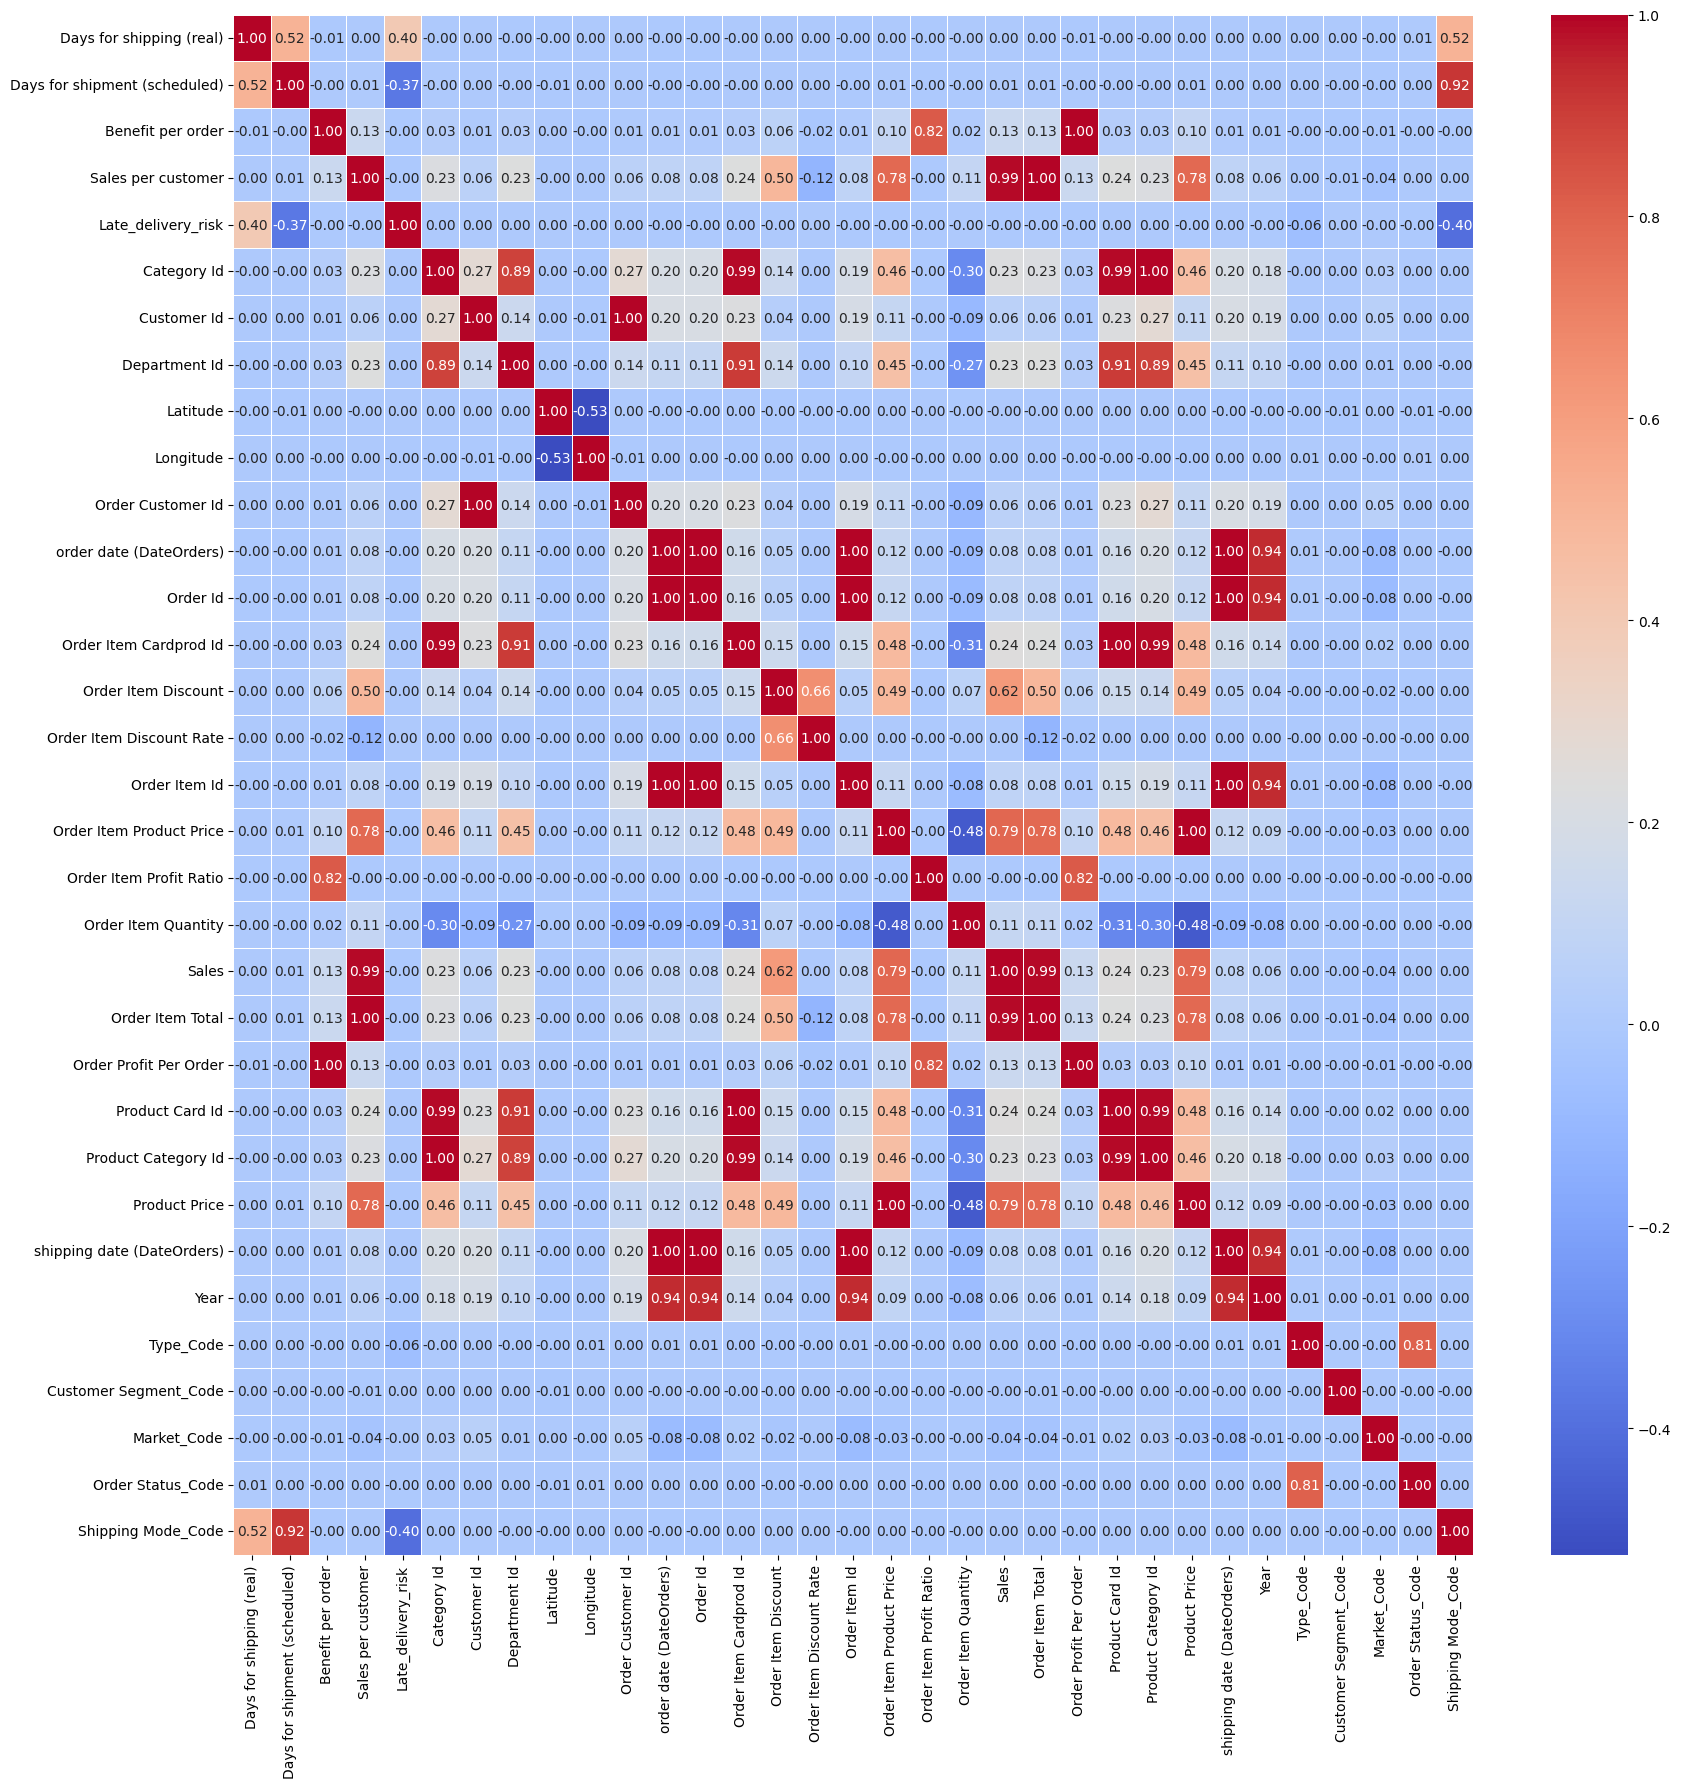

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

#Select only numeric columns from the dataframe
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix=numeric_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)



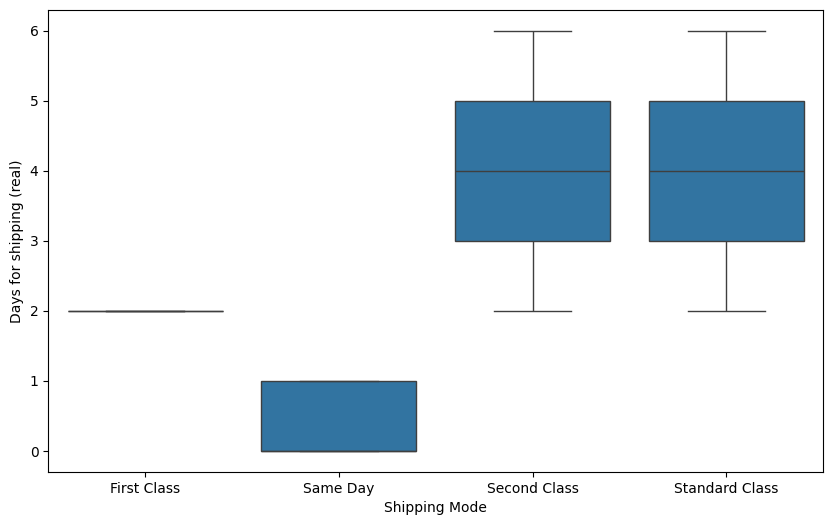

In [103]:
#Days For Shipment VS Shipment Mode#
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipping Mode', y='Days for shipping (real)', data=df)
plt.show()

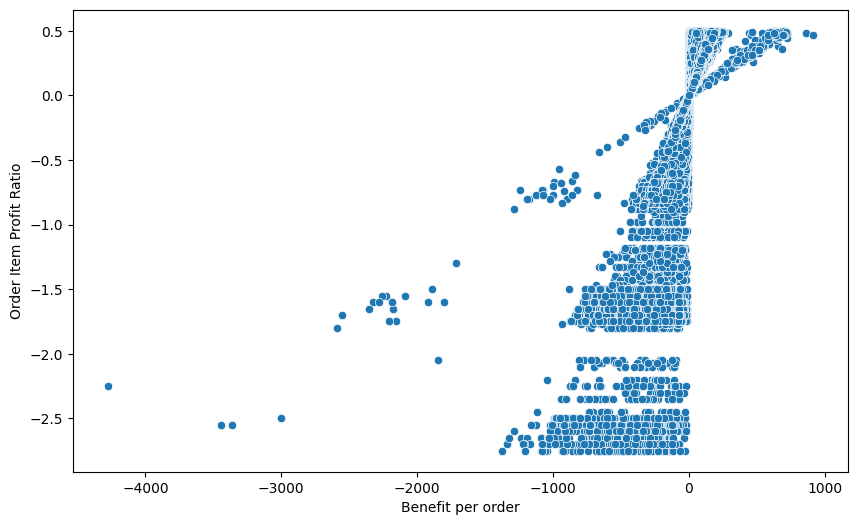

In [104]:
#Benefit for order VS Profit#
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Benefit per order', y='Order Item Profit Ratio', data=df)
plt.show()

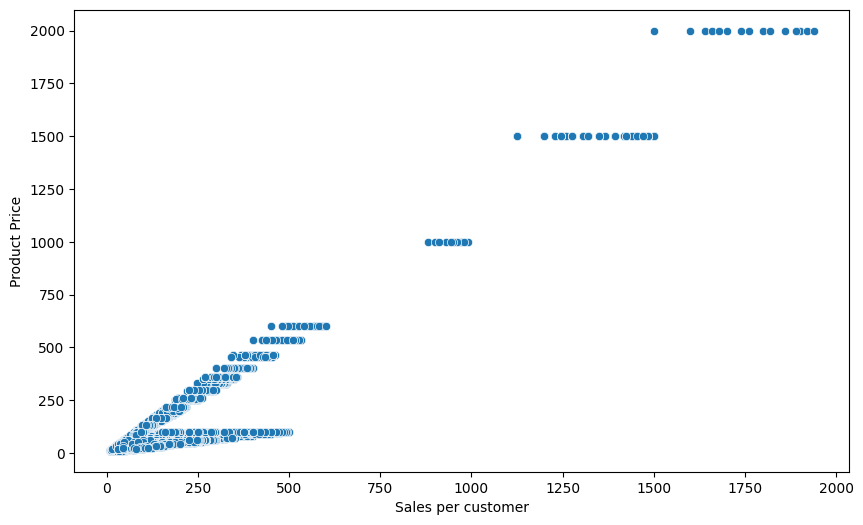

In [105]:
#SALES PER CUSTOMER VS PRODUCT PROCE#
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales per customer', y='Product Price', data=df)
plt.show()

In [106]:
skew_values = numeric_df.skew()
print(skew_values)

Days for shipping (real)         0
Days for shipment (scheduled)   -1
Benefit per order               -5
Sales per customer               3
Late_delivery_risk              -0
Category Id                      0
Customer Id                      0
Department Id                    0
Latitude                        -0
Longitude                       -0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              3
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         3
Order Item Profit Ratio         -3
Order Item Quantity              1
Sales                            3
Order Item Total                 3
Order Profit Per Order          -5
Product Card Id                  0
Product Category Id              0
Product Price                    3
shipping date (DateOrders)       0
Year                             0
Type_Code           

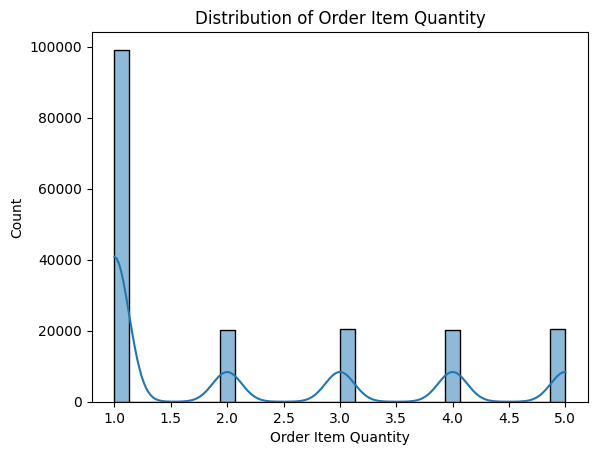

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Order Item Quantity'], kde=True, bins=30)
plt.title("Distribution of Order Item Quantity")
plt.show()

In [108]:
#DATA IS NEGATIVELY SKEWED#
from scipy.stats import boxcox

df['Order Item Quantity_boxcox'], _ = boxcox(df['Order Item Quantity'] + 1)

RANDOM FOREST

In [118]:
df['Customer Segment'] = pd.to_numeric(df['Customer Segment'], errors='coerce')
df['Customer Segment'] = df['Customer Segment'].fillna(df['Customer Segment'].mean())

df['Market'] = pd.to_numeric(df['Market'], errors='coerce')
df['Market'] = df['Market'].fillna(df['Market'].mean())

In [119]:
#PREDICT CUSTOMER DEMAND#
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



Independent_Variables=[ 'Category Id', 'Order Item Cardprod Id','Product Card Id',
                       'Product Category Id']

X=df[Independent_Variables]
Y=df['Order Item Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [120]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [121]:
# Calculate errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = np.mean(np.abs(y_pred - y_test))
MSE = np.mean((y_pred - y_test) ** 2)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE:.2f}")
print(f"Root Mean Squared Error: {RMSE:.2f}")
print(f"R-squared: {R2:.2f}")

Mean Absolute Error: 0.68
Root Mean Squared Error: 1.06
R-squared: 0.47


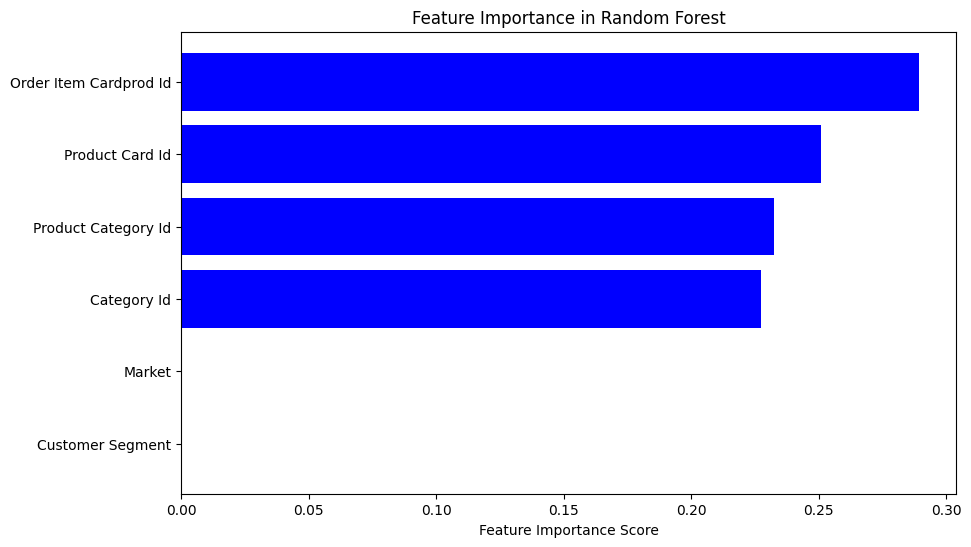

In [122]:
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(np.array(Independent_Variables)[sorted_idx], feature_importance[sorted_idx], color='blue')
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()